# Physical Model

\begin{equation*}
\partial_{t} u=D \partial_{x x} u+F(u(x, t), t), x \in[0 ; 2 \pi]
\end{equation*}

Initial Condition： 
$
u(x, 0)=u_{0}(x), x \in[0 ; 2 \pi]
$


Boundary Conditions： 
$
u(0, t)=u(2 \pi, t) ; \partial_{x} u(0, t)=\partial_{x} u(2 \pi, t), t \in[0 ; T]
$

$D$ - Coefficient of diffusion
$u_0 = \sin (5x) $\\

$F(u(x,t),t) = \sin (0.1*u(x,t),t)$


# Numerical Scheme
## Discretization
\begin{equation*}
x_n = n \Delta x, n = \overline{0, N}, \, \Delta x = \frac{2\pi}{N} 
\end{equation*}

\begin{equation*}
t_m = m \Delta t, \, m =\overline{0, M}, \, \Delta t = \frac{T}{M}
\end{equation*}
\begin{equation*}
u_n^m = u(n\Delta x,m \Delta t)
\end{equation*}



## Finite Difference
\begin{equation}
\left\{\begin{array}{l}
\frac{u_{n}^{m}-u_{n}^{m-1}}{\tau}+L_{n}\left(\frac{u^{m}+u^{m-1}}{2}\right)=\frac{F_{n}^{m}+F_{n}^{m-1}}{2}, m=\overline{0, M}, n=\overline{0, N} \\
u_{0}^{m}=u_{N}^{m}=\frac{u_{1}^{m}+u_{N-1}^{m}}{2} \\
u_{n}^{0}=u_{0}(x n), n=0,\dots, N
\end{array}\right.
\end{equation}
\begin{equation*}
L_{n} u^{m}=D \frac{u_{n+1}^{m}-2 u_{n}^{m}+u_{n-1}^{m}}{(\Delta x)^{2}}
\end{equation*}


## Fourier Method

\begin{equation*}
u^{m}\left(x_{n}\right)=\sum_{k=0}^{N} \widehat{u}_{k}^{m} e_{k}(x_n),  \,
\quad e_{k}(x_n)=\frac{1}{2 \pi} e^{i k x_n}, k=\overline{0, N}
\end{equation*}

\begin{equation*}
\left(E+\frac{\tau}{2} L_{n} \right) u^{(s)}=\left(E-\frac{\tau}{2} L_{n}\right) u^{m-1}+\tau \frac{F_{n}^{(s-1)}+F_{n}^{m-1}}{2}, n=\overline{0, N}
\end{equation*}


\begin{equation*}
\left\langle\left(E+\frac{\tau}{2} L_{n}\right) \sum_{k=0}^{N} \widehat{u}_{k}^{(s)} e_{k}, e_{p}\right\rangle=\left\langle\left(E-\frac{\tau}{2} L_{n}\right) \sum_{k=0}^{N} \widehat{u}_{k}^{m-1} e_{k}, e_{p}\right\rangle+\tau\left\langle\frac{F_{n}^{(s-1)}+F_{n}^{m-1}}{2}, e_{p}\right\rangle,\, p=\overline{0,N}
\end{equation*}

\begin{equation*}
\left(1+\frac{\tau}{2} \lambda_{l}\right) \widehat{u}_{l}^{(s)}=\left(1-\frac{\tau}{2} \lambda_{l}\right) \widehat{u}_{l}^{m}+\frac{\tau}{2} \phi_{l}^{m}, \quad \lambda_{k}=\frac{4 D}{(\Delta x)^{2}} \sin ^{2}\left(\frac{k \Delta x}{4}\right) \\
\widehat{u}_{l}^{(s)}=\frac{\left(2-\tau \lambda_{l}\right) u_{l}^{m-1}+\tau \phi_{l}^{m}}{2+\tau \lambda_{l}} , \quad \phi_{l}^{m}=\left\langle F_{n}^{(s-1)}+F_{n}^{m-1}, e_{l}\right\rangle, l=\overline{0,N}
\end{equation*}

Final Step: IFFT (Inverse fast Fourier transform)

\begin{equation*}
\left(1+\frac{\tau}{2} \lambda_{l}\right) \widehat{u}_{l}^{(s)}=\left(1-\frac{\tau}{2} \lambda_{l}\right) \widehat{u}_{l}^{m}+\frac{\tau}{2} \phi_{l}^{m}, \quad \lambda_{k}=\frac{4 D}{(\Delta x)^{2}} \sin ^{2}\left(\frac{k \Delta x}{4}\right) \\
\widehat{u}_{l}^{(s)}=\frac{\left(2-\tau \lambda_{l}\right) u_{l}^{m-1}+\tau \phi_{l}^{m}}{2+\tau \lambda_{l}} , \quad \phi_{l}^{m}=\left\langle F_{n}^{(s-1)}+F_{n}^{m-1}, e_{l}\right\rangle
\end{equation*}

# Numerical Solution
## Initialization

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft,irfft,rfft,fftfreq

**Set Parameters**

In [2]:
from sidecar import Sidecar
from ipywidgets import IntSlider,FloatSlider

sc = Sidecar(title='Set Parameters')
D_sc = IntSlider(description='D  (10$^{-4}$)',min=1,max=100,step=1,orientation='vertical')
M_sc = IntSlider(description='M',min=100,max=1e4,step=1e2,orientation='vertical')

dx_sc = FloatSlider(description='dx',min=1.e-2,max=1.,step=1.e-3,orientation='vertical')
dt_sc = FloatSlider(description='dt',min=.1,max=10,step=1.e-1,orientation='vertical')

with sc:
    display(D_sc,M_sc)
    display(dx_sc,dt_sc)

In [4]:
D = D_sc.value * 1.e-4 # coefficient of diffusion
M = M_sc.value  # steps
dt = dt_sc.value 
dx = dx_sc.value

T = dt * M
xLeft = 0
xRight = 2 * np.pi 
N = int((xRight - xLeft) / dx)

x = np.linspace(xLeft,xRight,num=N+1,endpoint=True)
t = np.linspace(0,T,num=M,endpoint=False)
u = np.zeros((len(t),len(x)))
u0 = np.sin(5*x) 
u[0] = u0

## Iteration

In [58]:
lambda_k = lambda k: 4 * D / (dx**2 )* (np.sin(k*dx/4)) ** 2
e_k = lambda k,x: 1/(2*np.pi) * np.exp(1j * k * x)
K = np.linspace(0,N+1,num=N+1,endpoint=False)

for i in range(1,len(t)):
    Au = np.zeros_like(x,dtype=complex) # amplitudes in complex
    Fm_1 = np.sin(0.1*u[i-1]+t[i-1])  # np.ones_like(x) #
    Fs_1 = Fm_1
    for l in range(len(x)):
        #phi =(Fm_1[l]+Fs_1[l]) * 1/(2*np.pi) * np.exp(1j * l)
        phi =np.sum((Fm_1+Fs_1) * e_k(l,x))
        Au[l] = ((2 - dt * lambda_k(l)) * u[i-1,l] + dt * phi) / (2 + dt * lambda_k(l))
    u[i] = np.fft.irfft(Au,n=N+1)
    #ux = lambda xn: np.sum(Au*e_k(K,xn))/ (N+1)
    #u[i] = np.array([ux(x[k]).real for k in range(len(x))])

## Plot result

(0.5, 5.783185307179586)

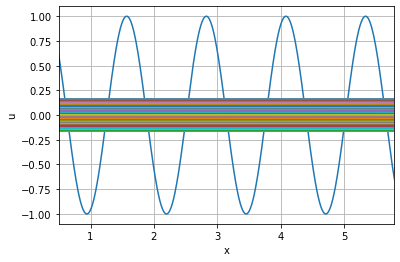

In [59]:
for i in range(0,len(t)):
    plt.plot(x,u[i],label='time = {:.0f}'.format(i*dt))
#plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('u')
plt.xlim(left=0+.5,right=2*np.pi-.5)
#plt.ylim(bottom=-1,top=1)

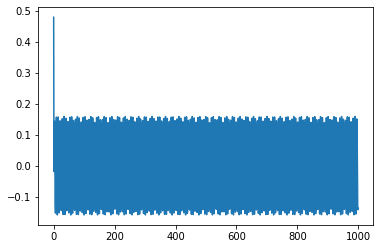

In [60]:
plt.plot(t,u[:,10])

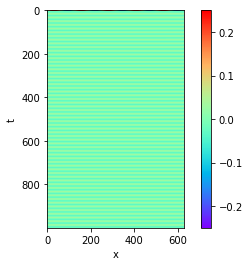

In [61]:
plt.imshow(u[0:,:],cmap='rainbow',vmin=-.25,vmax=.25)
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()